# Notebook phân tích dữ liệu khảo sát Stack Overflow 2021

1. Notebook nhằm giới thiệu cho người đọc các kiến thức **cơ bản** về Data Analyst, **không** phải kiến thức nâng cao.
2. Có ý kiến đóng góp vui lòng gửi tới Gmail: `hizamaakechi19901205@gmail.com`
3. *Tại sao notebook này không có Việt Nam?* Vì dữ liệu khảo sát quá ít nên cho dù có khảo sát cũng không có kết quả chính xác.
4. *Các hạng mục khác thì sao?* Notebook chưa phân tích hết tất cả các hạng mục mà dữ liệu `Stack Overflow` cung cấp mà chỉ đi vào các hạng mục được nhiều người quan tâm. Sẽ có cập nhật trong thời gian tới!
5. Đã sửa: 1 lần

In [1]:
# Load data
import pandas as pd

data_public = pd.read_csv('2021/survey_results_public.csv')
data_public

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


Câu hỏi cụ thể cho từng cột được lưu trong file `survey_results_schema.csv`

In [2]:
data_schema = pd.read_csv('2021/survey_results_schema.csv')
data_schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


(Chúng ta có thể thấy được rằng có một vài lỗi ở đây, các hàng ở `data_schema` không khớp với các cột ở `data_public`. Mình sẽ cập nhật lại khi dữ liệu được sửa)

Chẳng hạn cột `Language` trong data_public có nghĩa là:

In [3]:
# Option to print out the full string in the cell
pd.options.display.max_colwidth = 400

filt = data_schema['qname'] == 'Language'
data_schema[filt]['question']

20    Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
Name: question, dtype: object

## Rồi! Bắt đầu đi vào phân tích dữ liệu

## 1: Đầu tiên có lẽ là câu hỏi nhiều người quan tâm nhất: Ngôn ngữ nào on-top? Chúng ta bắt đầu tìm hiểu xem sao?
Để xem ứng viên khảo sát làm việc với ngôn ngữ gì ta truy cập cột `LanguageHaveWorkedWith`

In [4]:
data_public['LanguageHaveWorkedWith']

0        C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                    JavaScript;Python
2                             Assembly;C;Python;R;Rust
3                                JavaScript;TypeScript
4                       Bash/Shell;HTML/CSS;Python;SQL
                             ...                      
83434                               Clojure;Kotlin;SQL
83435                                              NaN
83436                               Groovy;Java;Python
83437             Bash/Shell;JavaScript;Node.js;Python
83438           Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

Có rất nhiều ngôn ngữ... nên ta chỉ xem xét các ngôn ngữ trong danh sách sau.

Chắc các bạn sẽ thắc mắc là tại sao lại có `C\++`. Lý do rất đơn giản, hàm `contains` phía dưới dùng `re` để so sánh chuỗi, dấu `+` là để xem nó có khớp với 1 hay nhiều ký tự đứng trước nó hay không? Dùng `C\++` là để cho `re` hiểu đây là chuỗi `C++`

In [5]:
list_lang = ['JavaScript', 'HTML/CSS', 'Java', 'Python', 'C++', 'C#', 'SQL', 'Swift', 'Node.js', 
             'PHP', 'Go', 'Kotlin', 'TypeScript', 'Objective-C']
# Count the number of people who know the above languages
num_people = []
for lang in list_lang:
    if lang == 'C++':
        lang = 'C\++'
    filt = data_public['LanguageHaveWorkedWith'].str.contains(lang, na=False)
    num_people.append(len(data_public.loc[filt, 'LanguageHaveWorkedWith']))
    
num_people

[53587,
 46259,
 62371,
 39792,
 20057,
 22984,
 38835,
 4204,
 27975,
 18130,
 7879,
 6866,
 24909,
 2310]

Nào! Giờ hãy vẽ biểu đồ biểu diễn nó!

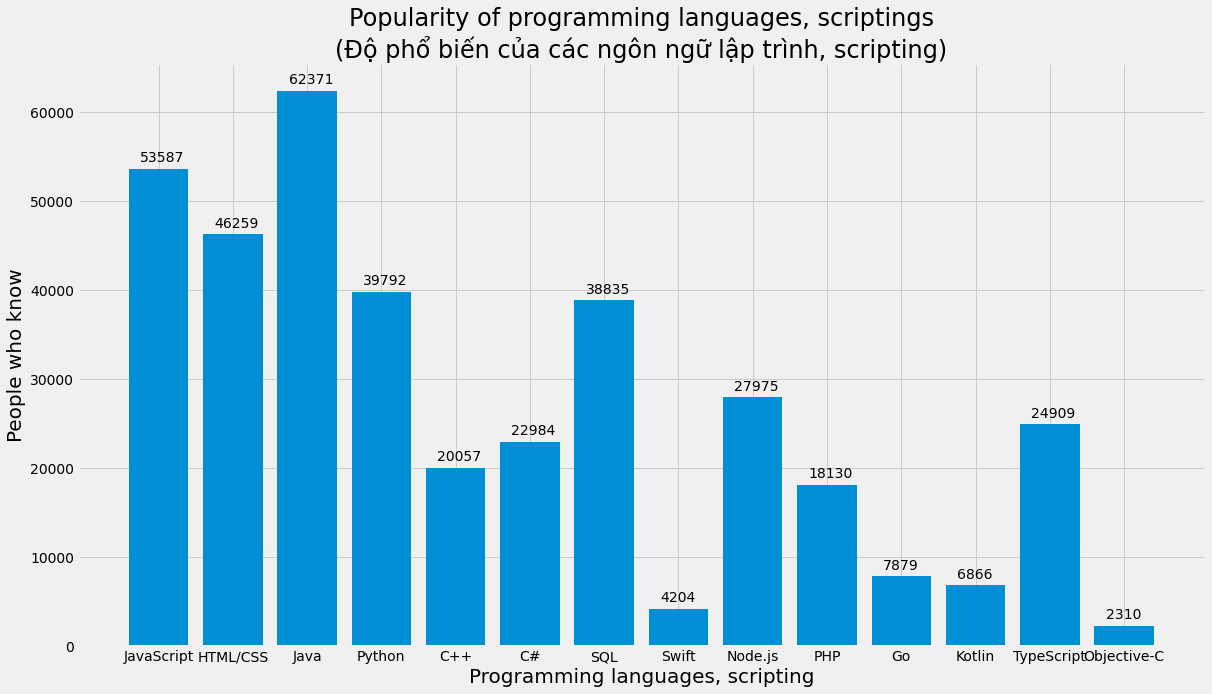

In [6]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_lang, num_people)
plt.xlabel('Programming languages, scripting', fontsize=20)
plt.ylabel('People who know', fontsize=20)
plt.title('Popularity of programming languages, scriptings\n(Độ phổ biến của các ngôn ngữ lập trình, scripting)', fontsize=24)

for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 800, str(num))
    
plt.savefig('02_Popularity_of_programming_languages.jpg')
plt.show()

Có thể bạn chưa biết thì thời gian lâu trước đây `Java` là một ngôn ngữ lập trình rất nổi tiếng và được sử dụng rộng rãi với hơn 3 tỉ máy chạy `Java` tính tổng tất cả. Bây giờ thì khác, lượng người dùng ít dần. Hơn nữa những người tham gia khảo sát chủ yếu là người đã đi làm.

## 2: Qua các năm, số người biết các ngôn này biến động ra sao? 
Chúng ta sẽ load dữ liệu 2 năm nữa là năm 2019 và năm 2020. Nên nhớ rằng mỗi năm số người tham gia khảo sát là khác nhau nên ta sẽ xem xét dựa trên tỉ lệ.

In [7]:
data_2019 = pd.read_csv('2019/survey_results_public.csv')
data_2020 = pd.read_csv('2020/survey_results_public.csv')

after_dropna_2019 = data_2019[data_2019['LanguageWorkedWith'].notna()]
after_dropna_2020 = data_2020[data_2020['LanguageWorkedWith'].notna()]
after_dropna_2021 = data_public[data_public['LanguageHaveWorkedWith'].notna()]

info_2019 = []
info_2020 = []
info_2021 = []
for lang in list_lang:
    if lang == 'C++':
        lang = 'C\++'
    # In previous years, this information was in column 'LanguageWorkedWith'
    # shape[0] returns row number, -1 is header row drop
    filt1 = data_2019['LanguageWorkedWith'].str.contains(lang, na=False)
    info_2019.append(len(data_2019.loc[filt1, 'LanguageWorkedWith'])/(after_dropna_2019.shape[0] - 1) * 100)
    
    filt2 = data_2020['LanguageWorkedWith'].str.contains(lang, na=False)
    info_2020.append(len(data_2020.loc[filt2, 'LanguageWorkedWith'])/(after_dropna_2020.shape[0] - 1) * 100)
    
    filt3 = data_public['LanguageHaveWorkedWith'].str.contains(lang, na=False)
    info_2021.append(len(data_public.loc[filt3, 'LanguageHaveWorkedWith'])/(after_dropna_2021.shape[0] - 1) * 100)
    
info_2019

[67.62630184542299,
 63.34048967659419,
 80.06691942262013,
 41.616800657774526,
 23.43778549241732,
 30.943952128631462,
 54.29380595651379,
 6.559473780376393,
 0.0,
 26.299561483646993,
 8.223323588525489,
 6.417869541384981,
 21.15270418417687,
 4.7859948839758815]

Nào giờ hãy biểu diễn nó

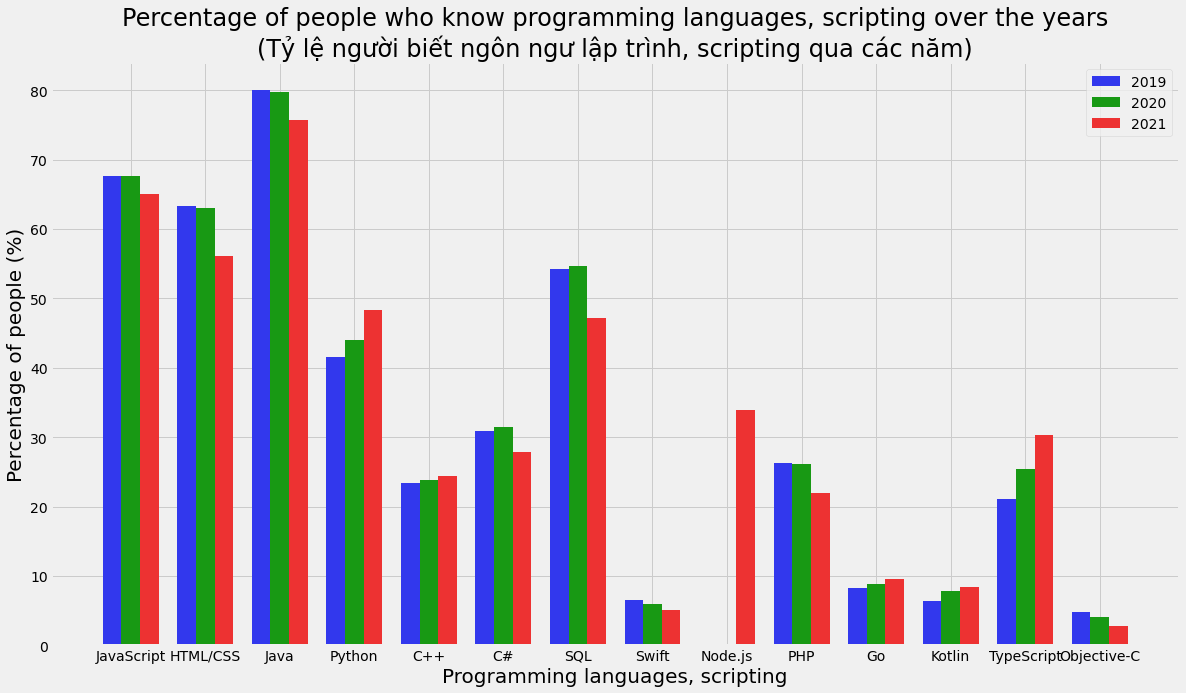

In [8]:
import numpy as np

x_indexes = np.arange(len(list_lang))
width = 0.25

plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,10))

plt.bar(x_indexes - width, info_2019, width = width, color = '#3238ed', label = '2019')
plt.bar(x_indexes, info_2020, width = width, color = '#189914', label = '2020')
plt.bar(x_indexes + width, info_2021, width = width, color = '#ed3232', label = '2021')

plt.xticks(ticks = x_indexes, labels = list_lang)

plt.title('Percentage of people who know programming languages, \
scripting over the years\n(Tỷ lệ người biết ngôn ngư lập trình, scripting qua các năm)', fontsize = 24)
plt.xlabel('Programming languages, scripting', fontsize=20)
plt.ylabel('Percentage of people (%)', fontsize=20)
plt.legend()
plt.savefig('03_Percentage_of_people_who_know_programming_languages.jpg')
plt.show()

Qua đồ thị ta có thể thấy qua các năm số người biết một số ngôn ngữ, scripting giảm dần như `HTML/CSS`, `C#`, `SQL`, `PHP`, `Objective-C`...

Một số ngôn ngữ có tỷ lệ người biết tăng dần như `Python` (tăng nhanh từ năm trước đến năm nay), `Kotlin`, `TypeScript`...

## 3: Trong tương lai nên học ngôn ngữ nào?
Trong bản khảo sát, người tham gia cần trả lời câu hỏi 'Language Want To Work With'. Hãy biểu diễn thông tin này

In [9]:
data_public['LanguageWantToWorkWith']

0                                                             Swift
1                                                               NaN
2                                                 Julia;Python;Rust
3                                             JavaScript;TypeScript
4                                    Bash/Shell;HTML/CSS;Python;SQL
                                    ...                            
83434                                                       Clojure
83435                                                           NaN
83436                                                   Java;Python
83437                                                       Go;Rust
83438    Elixir;HTML/CSS;Java;JavaScript;Node.js;PHP;SQL;TypeScript
Name: LanguageWantToWorkWith, Length: 83439, dtype: object

In [10]:
new_list = ['JavaScript', 'HTML/CSS', 'Java', 'Python', 'C++', 'C#', 'SQL', 'Rust', 'Node.js', 
             'PHP', 'Go', 'Kotlin', 'TypeScript', 'Julia', 'Objective-C']

num_people_want = []
for lang in new_list:
    if lang == 'C++':
        lang = 'C\++'
    filt = data_public['LanguageWantToWorkWith'].str.contains(lang, na=False)
    num_people_want.append(len(data_public.loc[filt, 'LanguageWantToWorkWith']))

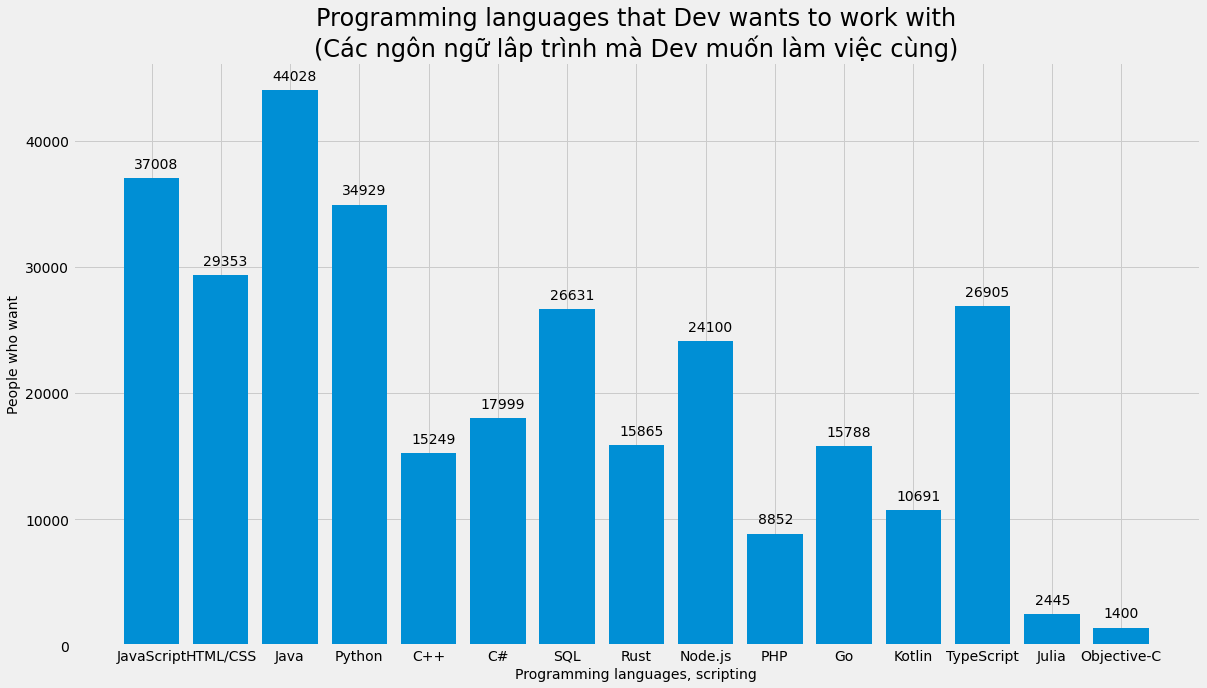

In [11]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(new_list, num_people_want)
plt.xlabel('Programming languages, scripting', fontsize=14)
plt.ylabel('People who want', fontsize=14)
plt.title('Programming languages that Dev wants to work \
with\n(Các ngôn ngữ lâp trình mà Dev muốn làm việc cùng)', fontsize=24)

for idx, num in enumerate(num_people_want):
    plt.text(idx - 0.25, num + 800, str(num))
    
plt.savefig('04_Programming_languages_Dev_wants.jpg')
plt.show()

## 4: Vậy qua các năm thì sao?

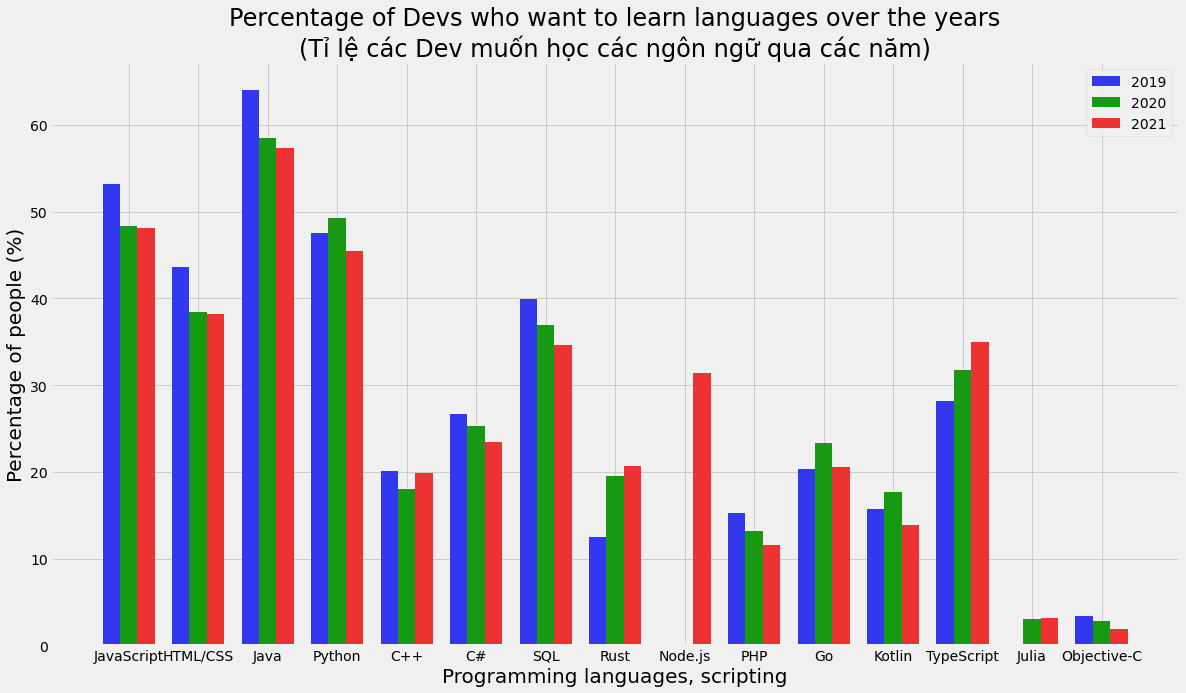

In [12]:
info_2019 = []
info_2020 = []
info_2021 = []

after_dropna_2019 = data_2019[data_2019['LanguageDesireNextYear'].notna()]
after_dropna_2020 = data_2020[data_2020['LanguageDesireNextYear'].notna()]
after_dropna_2021 = data_public[data_public['LanguageWantToWorkWith'].notna()]

for lang in new_list:
    if lang == 'C++':
        lang = 'C\++'
    # In previous years, this information was in column 'LanguageDesireNextYear'
    # shape[0] returns row number, -1 is header row drop
    filt1 = data_2019['LanguageDesireNextYear'].str.contains(lang, na=False)
    info_2019.append(len(data_2019.loc[filt1, 'LanguageDesireNextYear'])/(after_dropna_2019.shape[0] - 1) * 100)
    
    filt2 = data_2020['LanguageDesireNextYear'].str.contains(lang, na=False)
    info_2020.append(len(data_2020.loc[filt2, 'LanguageDesireNextYear'])/(after_dropna_2020.shape[0] - 1) * 100)
    
    filt3 = data_public['LanguageWantToWorkWith'].str.contains(lang, na=False)
    info_2021.append(len(data_public.loc[filt3, 'LanguageWantToWorkWith'])/(after_dropna_2021.shape[0] - 1) * 100)

x_indexes = np.arange(len(new_list))
width = 0.25

plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,10))

plt.bar(x_indexes - width, info_2019, width = width, color = '#3238ed', label = '2019')

plt.bar(x_indexes, info_2020, width = width, color = '#189914', label = '2020')

plt.bar(x_indexes + width, info_2021, width = width, color = '#ed3232', label = '2021')

plt.xticks(ticks = x_indexes, labels = new_list)

plt.title('Percentage of Devs who want to learn languages over \
the years\n(Tỉ lệ các Dev muốn học các ngôn ngữ qua các năm)', fontsize = 24)
plt.xlabel('Programming languages, scripting', fontsize=20)
plt.ylabel('Percentage of people (%)', fontsize=20)
plt.legend()
plt.savefig('05_Percentage_of_Devs_who_want_to_learn_languages.jpg')
plt.show()

Có thể nói `TypeScript` đang được xem là ngôn ngữ phát triển nhanh nhất trong những năm gần đây!

## 5: Data base phổ biến nhất

In [13]:
data_public['DatabaseHaveWorkedWith'].value_counts()

MySQL                                                             4777
Microsoft SQL Server                                              3823
PostgreSQL                                                        3537
SQLite                                                            2191
MongoDB                                                           1656
                                                                  ... 
Firebase;IBM DB2;MariaDB;MySQL;Oracle;SQLite                         1
Cassandra;MariaDB;Microsoft SQL Server;MySQL;Oracle;PostgreSQL       1
Firebase;MariaDB;MongoDB;Redis;SQLite                                1
Cassandra;Elasticsearch;MySQL;Oracle;SQLite                          1
Elasticsearch;Firebase;IBM DB2;MySQL;Oracle;PostgreSQL;Redis         1
Name: DatabaseHaveWorkedWith, Length: 3072, dtype: int64

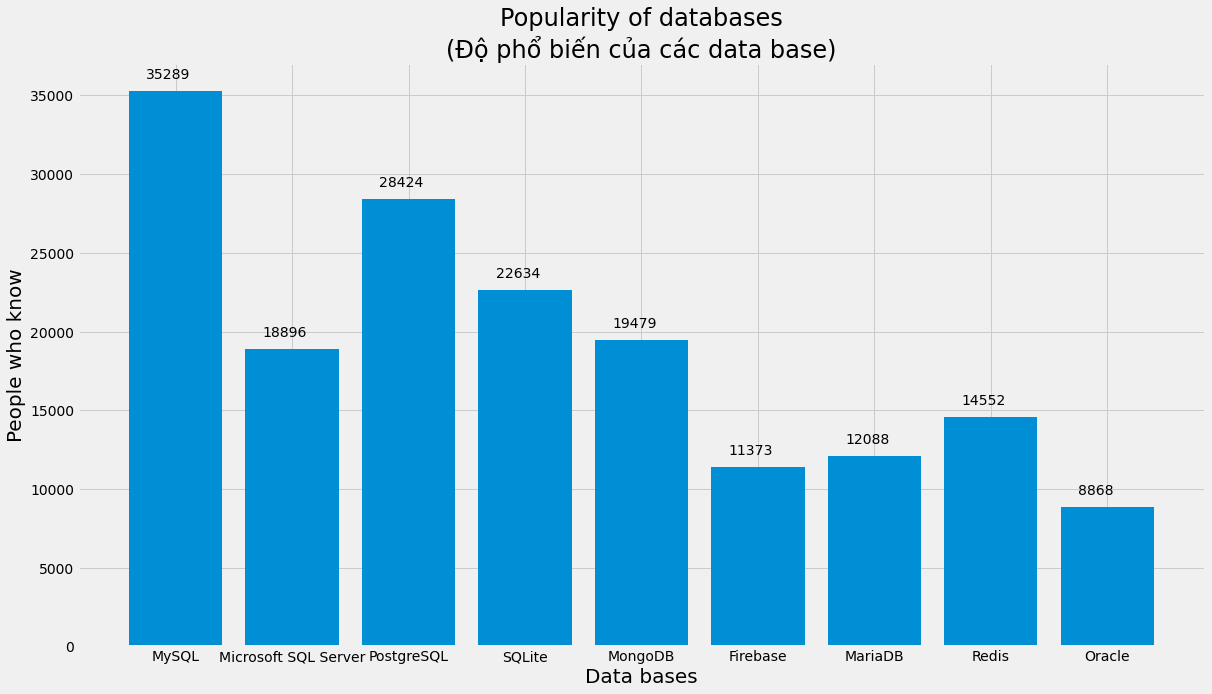

In [14]:
list_data = ['MySQL', 'Microsoft SQL Server', 'PostgreSQL', 'SQLite', 'MongoDB', 'Firebase', 'MariaDB', 'Redis', 'Oracle']

num_people = []
for data in list_data:
    filt = data_public['DatabaseHaveWorkedWith'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'DatabaseHaveWorkedWith']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_data, num_people)
plt.xlabel('Data bases', fontsize=20)
plt.ylabel('People who know', fontsize=20)
plt.title('Popularity of databases\n(Độ phổ biến của các data base)', fontsize=24)

for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 800, str(num))
    
plt.savefig('06_Popularity_of_databases.jpg')
plt.show()

## 6: Data base được các Dev muốn làm việc cùng nhất

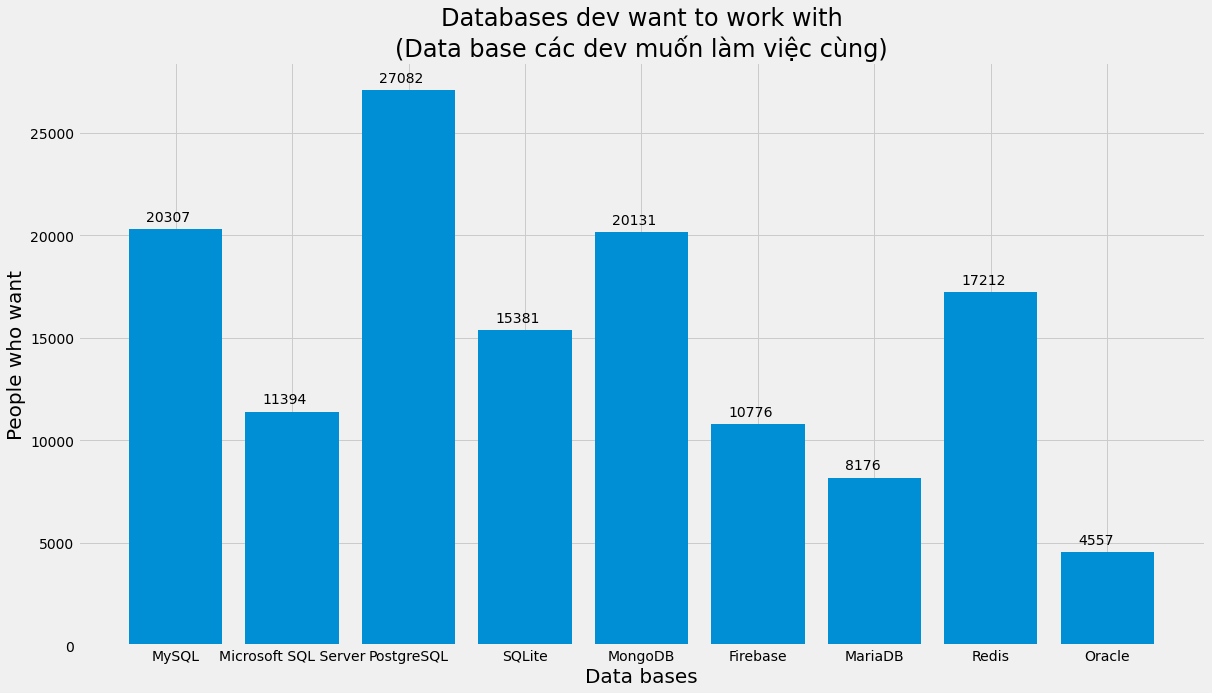

In [15]:
list_data = ['MySQL', 'Microsoft SQL Server', 'PostgreSQL', 'SQLite', 'MongoDB', 'Firebase', 'MariaDB', 'Redis', 'Oracle']

num_people = []
for data in list_data:
    filt = data_public['DatabaseWantToWorkWith'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'DatabaseWantToWorkWith']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_data, num_people)
plt.xlabel('Data bases', fontsize=20)
plt.ylabel('People who want', fontsize=20)
plt.title('Databases dev want to work with\n(Data base các dev muốn làm việc cùng)', fontsize=24)

for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 400, str(num))
    
plt.savefig('07_Databases_want_to_work_with.jpg')
plt.show()

`PostgreSQL` được nhiều Dev hướng đến cho thấy tiềm năng phát triển mạnh mẽ trong tương lai

## 7: Web Framework phổ biến nhất

In [16]:
data_public['WebframeHaveWorkedWith']

0                                     Laravel;Symfony
1                                Angular;Flask;Vue.js
2                                               Flask
3                                      Angular;jQuery
4                                               Flask
                             ...                     
83434                                             NaN
83435    Django;jQuery;Laravel;React.js;Ruby on Rails
83436                                   FastAPI;Flask
83437                   Django;Express;Flask;React.js
83438                                  Angular;Spring
Name: WebframeHaveWorkedWith, Length: 83439, dtype: object

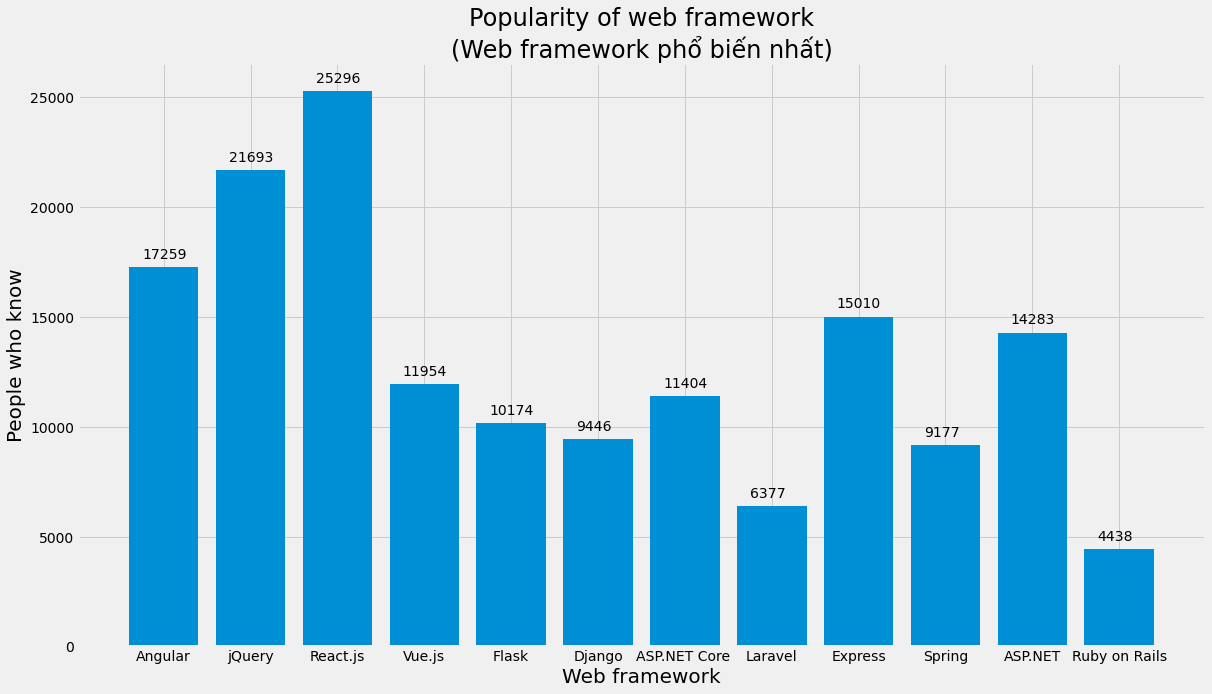

In [17]:
list_web = ['Angular', 'jQuery', 'React.js', 'Vue.js', 'Flask', 'Django', 
            'ASP.NET Core ', 'Laravel', 'Express', 'Spring', 'ASP.NET', 'Ruby on Rails']

num_people = []
for data in list_web:
    filt = data_public['WebframeHaveWorkedWith'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'WebframeHaveWorkedWith']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_web, num_people)
plt.xlabel('Web framework', fontsize=20)
plt.ylabel('People who know', fontsize=20)
plt.title('Popularity of web framework\n(Web framework phổ biến nhất)', fontsize=24)

for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 400, str(num))
    
plt.savefig('08_Popularity_of_web_framework.jpg')
plt.show()

## 8: Web framework các Dev muốn làm việc cùng

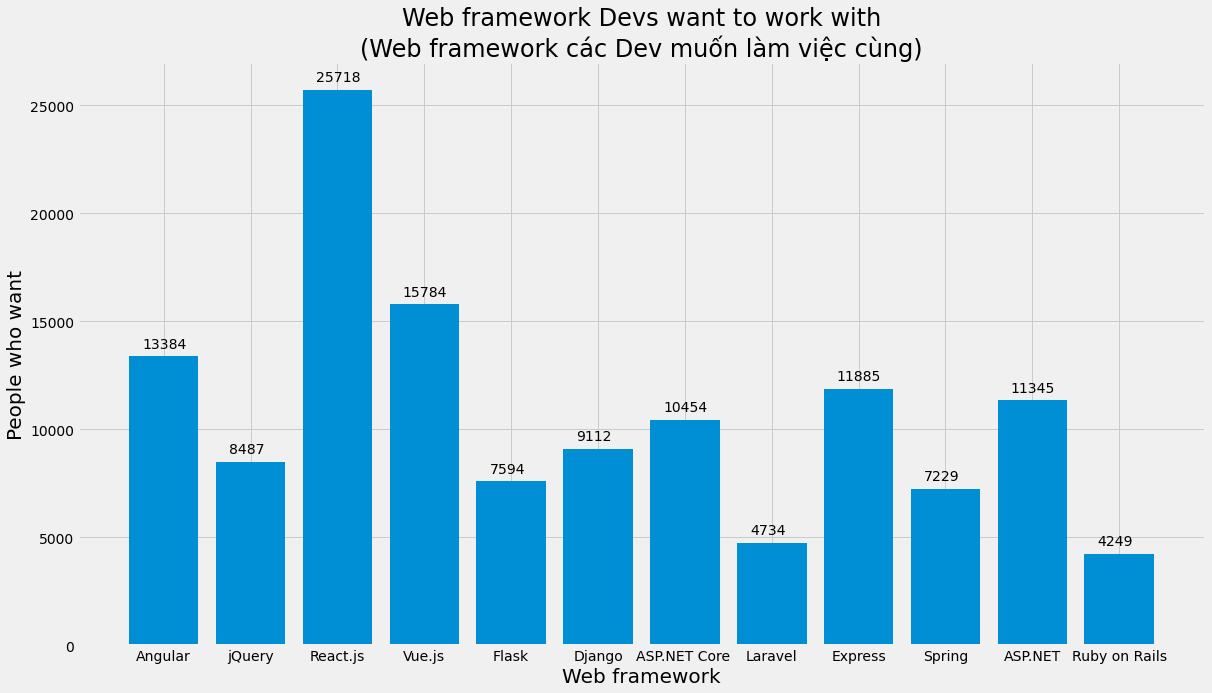

In [18]:
num_people = []
for data in list_web:
    filt = data_public['WebframeWantToWorkWith'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'WebframeWantToWorkWith']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_web, num_people)
plt.xlabel('Web framework', fontsize=20)
plt.ylabel('People who want', fontsize=20)
plt.title('Web framework Devs want to work with\n(Web framework các Dev muốn làm việc cùng)', fontsize=24)

for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 400, str(num))
    
plt.savefig('09_Webframe_Want_To_Work_With.jpg')
plt.show()

`jQuery` được nhiều người dùng nhưng lại không nhiều người muốn học nó.

`React.js` thực sự là một framework rất mạnh và có tiềm năng phát triển. 

## 9: Các framework và các thư viện nổi tiếng khác

In [19]:
data_public['MiscTechHaveWorkedWith']

0                                          NaN
1                                      Cordova
2        NumPy;Pandas;TensorFlow;Torch/PyTorch
3                                          NaN
4             Apache Spark;Hadoop;NumPy;Pandas
                         ...                  
83434                                      NaN
83435                               Flutter;Qt
83436                Hadoop;Keras;NumPy;Pandas
83437    NumPy;Pandas;TensorFlow;Torch/PyTorch
83438                                      NaN
Name: MiscTechHaveWorkedWith, Length: 83439, dtype: object

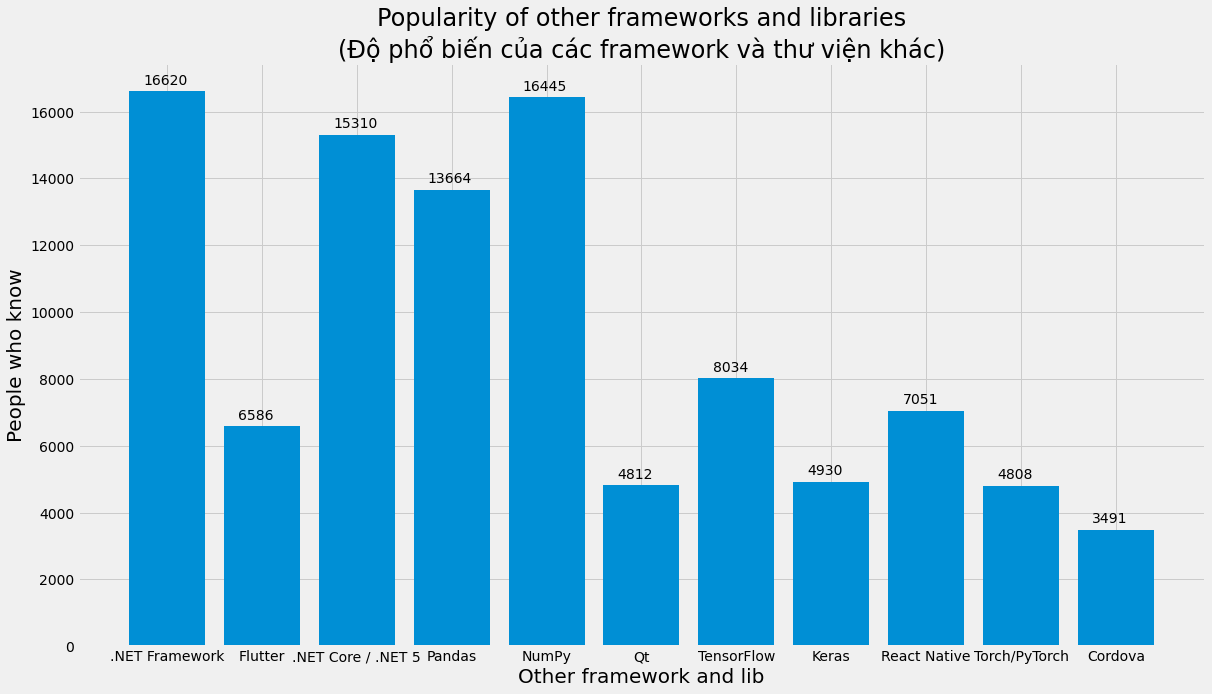

In [20]:
list_lib = ['.NET Framework', 'Flutter', '.NET Core / .NET 5',  'Pandas', 'NumPy', 'Qt', 'TensorFlow', 
            'Keras', 'React Native', 'Torch/PyTorch', 'Cordova']
num_people = []
for data in list_lib:
    filt = data_public['MiscTechHaveWorkedWith'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'MiscTechHaveWorkedWith']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_lib, num_people)
plt.xlabel('Other framework and lib', fontsize=20)
plt.ylabel('People who know', fontsize=20)
plt.title('Popularity of other frameworks and libraries\n(Độ phổ biến của các framework và thư viện khác)', fontsize=24)

for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 200, str(num))
    
plt.savefig('10_Popularity_of_other_frameworks.jpg')
plt.show()

## 10: Ngoài các web framework, các Dev muốn làm việc các framework, thư viện nào khác?

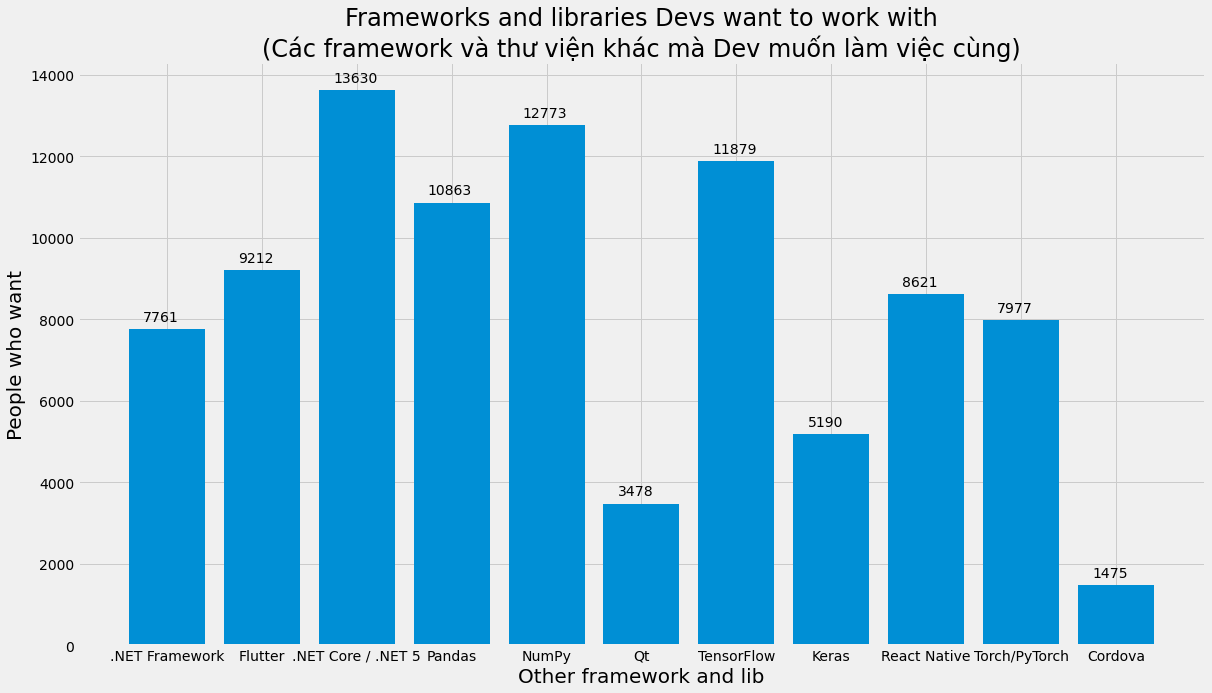

In [21]:
num_people = []
for data in list_lib:
    filt = data_public['MiscTechWantToWorkWith'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'MiscTechWantToWorkWith']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_lib, num_people)
plt.xlabel('Other framework and lib', fontsize=20)
plt.ylabel('People who want', fontsize=20)
plt.title('Frameworks and libraries Devs want to work with\n(Các framework và thư viện khác mà Dev muốn làm việc cùng)', 
          fontsize=24)

for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 200, str(num))
    
plt.savefig('11_Libraries_Devs_want_to_know.jpg')
plt.show()

Ta có thể thấy rằng cột `TensorFlow` và `Torch/PyTorch` tăng rất cao! Đây là 2 thư viện liên quan đến AI - xu thế của thế giới

## 11: Các công cụ soạn thảo thông dụng

In [22]:
data_public['NEWCollabToolsHaveWorkedWith'].value_counts().head(5)

Visual Studio Code                            6700
Visual Studio;Visual Studio Code              3357
Notepad++;Visual Studio;Visual Studio Code    2382
Vim;Visual Studio Code                        1527
IntelliJ;Visual Studio Code                   1378
Name: NEWCollabToolsHaveWorkedWith, dtype: int64

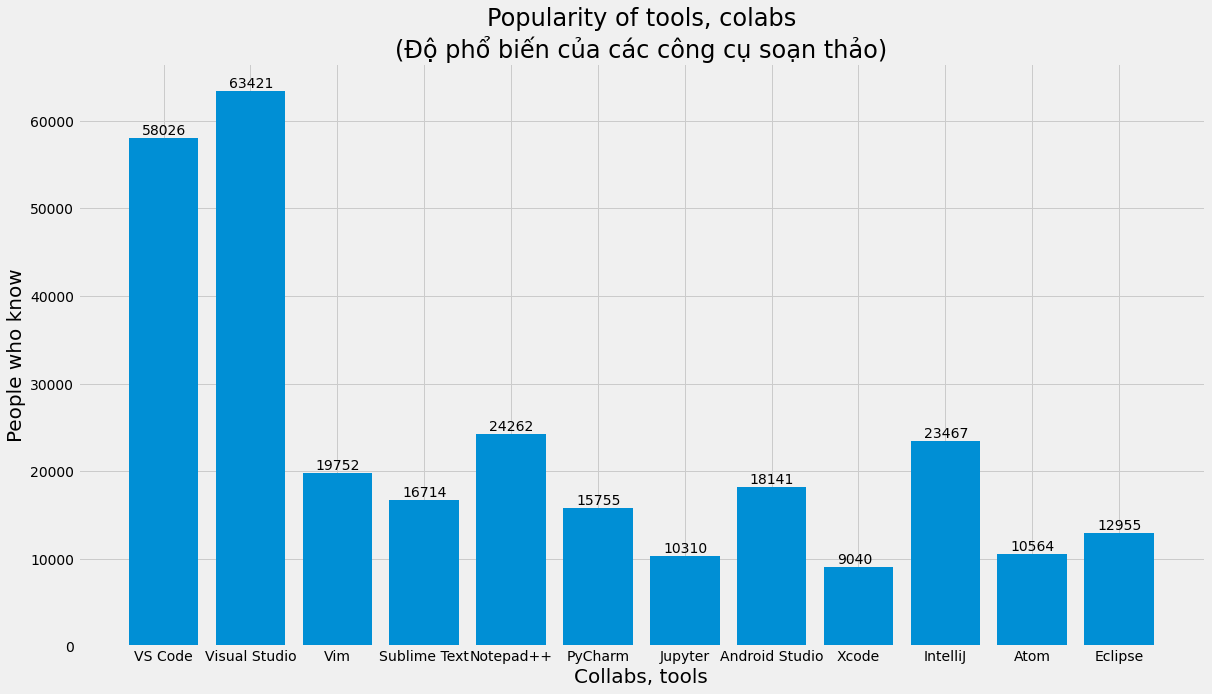

In [23]:
list_tool = ['Visual Studio Code', 'Visual Studio', 'Vim', 'Sublime Text', 'Notepad++', 'PyCharm', 
             'IPython/Jupyter', 'Android Studio', 'Xcode', 'IntelliJ', 'Atom', 'Eclipse']
num_people = []
for data in list_tool:
    if data == 'Notepad++':
        data = 'Notepad\++'
    filt = data_public['NEWCollabToolsHaveWorkedWith'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'NEWCollabToolsHaveWorkedWith']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.bar(list_tool, num_people)
plt.xlabel('Collabs, tools', fontsize=20)
plt.ylabel('People who know', fontsize=20)
plt.title('Popularity of tools, colabs\n(Độ phổ biến của các công cụ soạn thảo)', fontsize=24)
x_label = ['VS Code', 'Visual Studio', 'Vim', 'Sublime Text', 'Notepad++', 'PyCharm', 
             'Jupyter', 'Android Studio', 'Xcode', 'IntelliJ', 'Atom', 'Eclipse']
plt.xticks(ticks=list_tool, labels=x_label)
for idx, num in enumerate(num_people):
    plt.text(idx - 0.25, num + 400, str(num))
    
plt.savefig('12_Popularity_of_tools.jpg')
plt.show()

## 12: Khi gặp vấn đề các Dev thường làm gì?

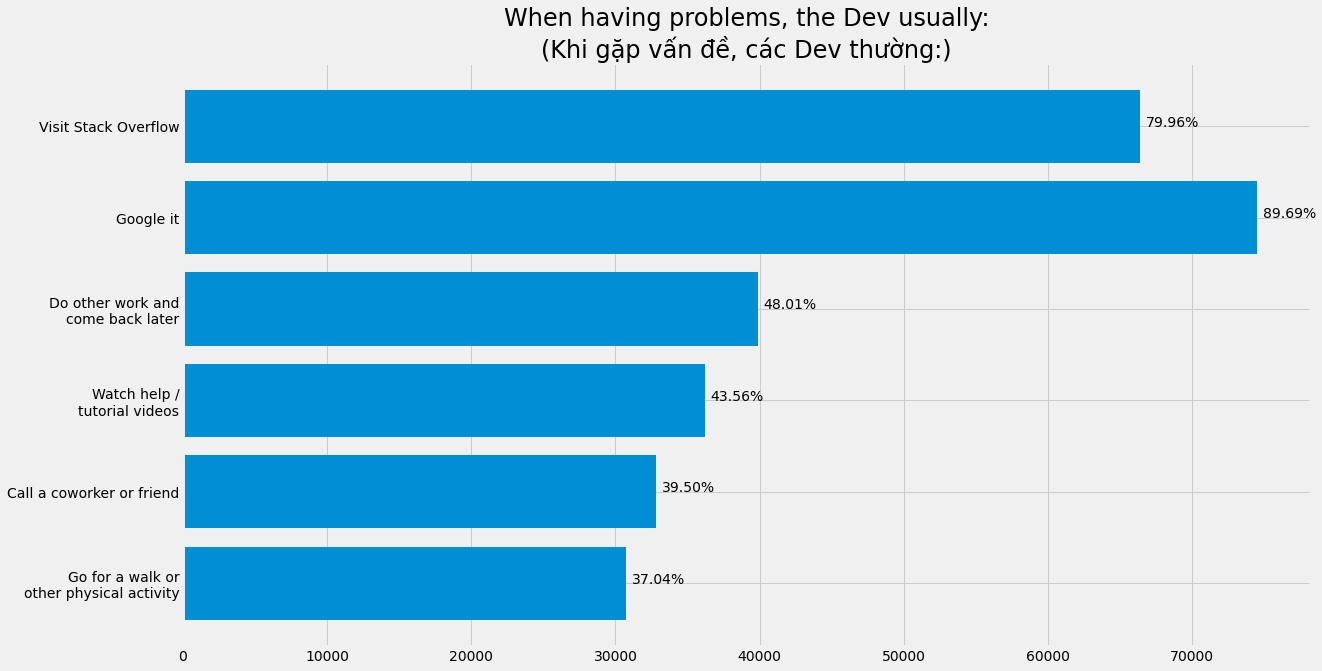

In [24]:
list_workarounds = ['Visit Stack Overflow', 'Google it', 'Do other work and come back later', 'Watch help / tutorial videos',
                   'Call a coworker or friend', 'Go for a walk or other physical activity']
list_workarounds.reverse()

after_dropna = data_public[data_public['NEWStuck'].notna()]

num_people = []
for data in list_workarounds:
    filt = data_public['NEWStuck'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'NEWStuck']))
    
plt.style.use('fivethirtyeight')

y_label = ['Visit Stack Overflow', 'Google it', 'Do other work and\ncome back later', 'Watch help /\ntutorial videos',
                   'Call a coworker or friend', 'Go for a walk or\nother physical activity']
y_label.reverse()
plt.figure(figsize=(18,10))
plt.barh(y_label, num_people)

plt.title('When having problems, the Dev usually:\n(Khi gặp vấn đề, các Dev thường:)', fontsize=24)
for idx, num in enumerate(num_people):
    plt.text(num + 400, idx, '%.2f%%'%(num / (after_dropna.shape[0]- 1) * 100))
    
plt.savefig('13_When_having_problems.jpg')
plt.show()

## 13: Giới tính người tham gia khảo sát
Ngành CNTT có nhiều gái không. Chúng ta cung tìm hiểu xem nhé!

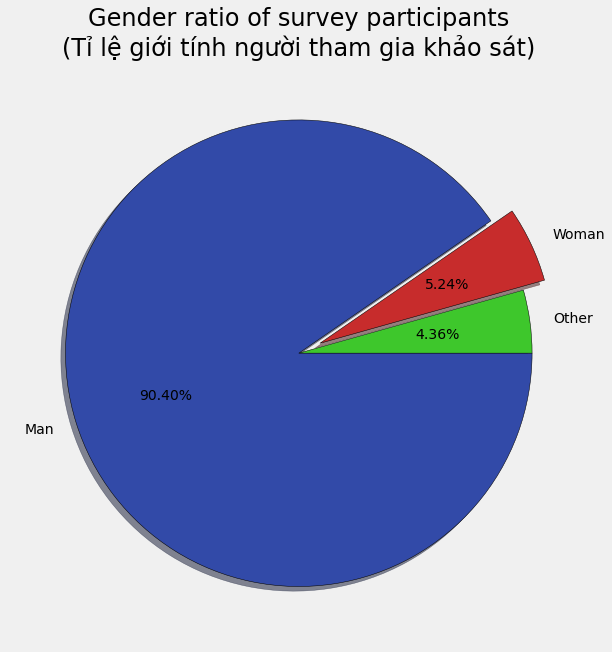

In [25]:
filt_man = data_public['Gender'].str.contains('Man', na=False)
num_man = len(data_public.loc[filt_man, 'Gender'])/(data_public.shape[0] - 1) * 100

filt_woman = data_public['Gender'].str.contains('Woman', na=False)
num_woman = len(data_public.loc[filt_woman, 'Gender'])/(data_public.shape[0] - 1) * 100
other = 100 - num_man - num_woman

plt.figure(figsize=(18, 10))
labels = ['Other', 'Woman', 'Man']
colors = ['#3ec72c', '#c72c2c', '#324aa8']
explode = [0, 0.1, 0]
plt.pie([other, num_woman, num_man], labels = labels, colors=colors, shadow = True,
        autopct='%1.2f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# for idx, num in enumerate([other, num_woman, num_man]):
#     plt.text(num, idx, '%.2f'%num + '%')

plt.title('Gender ratio of survey participants\n(Tỉ lệ giới tính người tham gia khảo sát)', fontsize=24)
plt.savefig('14_Gender_ratio.jpg')
plt.show()

Ngành này ít gái ngành kia nhiều gái là chuyện bình thường. Ae cứ yên tâm nhé

## 14: Phân bổ các ngành nghề tham gia khảo sát

In [26]:
data_public['DevType'].value_counts().head(5)                                    

Developer, full-stack                                             8601
Developer, back-end                                               5467
Developer, front-end                                              2402
Developer, front-end;Developer, full-stack;Developer, back-end    2141
Developer, full-stack;Developer, back-end                         1774
Name: DevType, dtype: int64

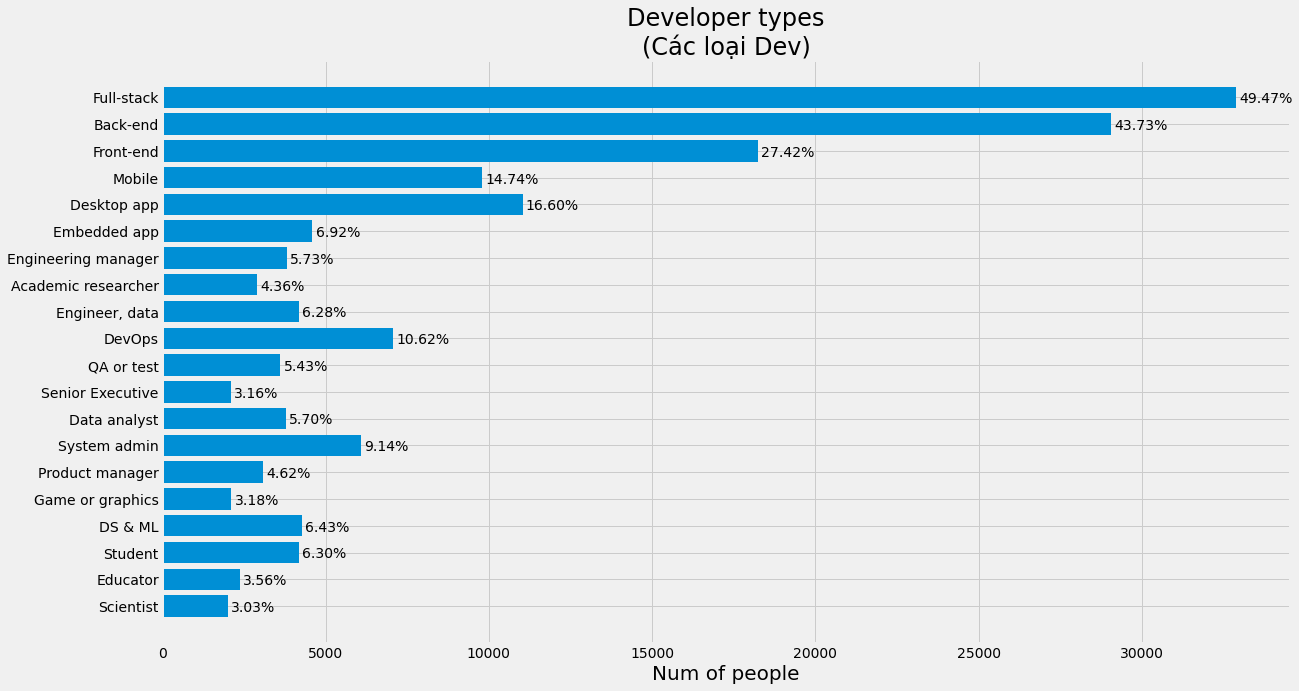

In [27]:
list_type = ['Developer, full-stack', 'Developer, back-end', 'Developer, front-end', 'Developer, mobile', 
            'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 
            'Engineering manager', 'Academic researcher', 'Engineer, data', 'DevOps specialist', 'Developer, QA or test',
            'Senior Executive', 'Data or business analyst', 'System administrator', 'Product manager',
            'Developer, game or graphics', 'Data scientist or machine learning specialist', 'Student', 'Educator', 'Scientist']

after_dropna = data_public[data_public['DevType'].notna()]

list_type.reverse()
num_people = []
for data in list_type:
    filt = data_public['DevType'].str.contains(data, na=False)
    num_people.append(len(data_public.loc[filt, 'DevType']))
    
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,10))
plt.barh(list_type, num_people)

plt.xlabel('Num of people', fontsize=20)
plt.title('Developer types\n(Các loại Dev)', fontsize=24)
y_label = ['Full-stack', 'Back-end', 'Front-end', 'Mobile', 
            'Desktop app', 'Embedded app', 
            'Engineering manager', 'Academic researcher', 'Engineer, data', 'DevOps', 'QA or test',
            'Senior Executive', 'Data analyst', 'System admin', 'Product manager',
            'Game or graphics', 'DS & ML', 'Student', 'Educator', 'Scientist']
y_label.reverse()
plt.yticks(ticks=list_type, labels=y_label)
for idx, num in enumerate(num_people):
    plt.text(num + 100, idx - 0.2, '%.2f%%'%(num / (after_dropna.shape[0]- 1) * 100))
    
plt.savefig('15_Dev_types.jpg')
plt.show()

Ta có thể thấy công việc làm web thực sự rất phổ biến. Mọi công ty, mọi ý tưởng đều được mọi người lên ý tưởng để thể hiện nó trên web.

Các ngành như phân tích dữ liệu, khoa học dữ liệu và Machine Learning không có nhiều người theo tuy nhiên trước sự bùng nổ của thời kỳ 4.0 các ngành này thực sự có tiềm năng rất lớn trong tương lai.

## 15: Phân bổ các độ tuổi tham gia khảo sát

In [28]:
data_public['Age'].value_counts().head(20)

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [29]:
values = data_public['Age'].value_counts().values.tolist()
values

[32568, 20993, 15183, 5472, 5376, 1819, 575, 421]

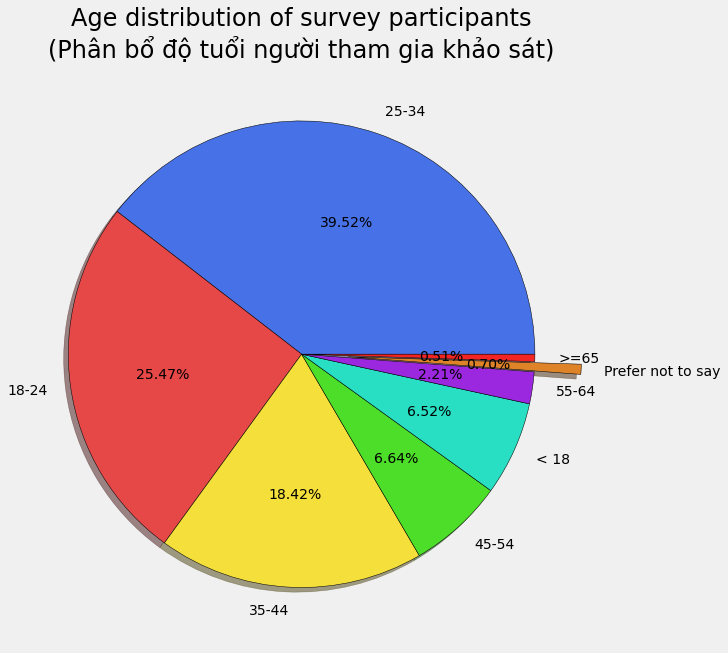

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 10))

labels = ['25-34', '18-24', '35-44', '45-54', '< 18', '55-64', 'Prefer not to say', '>=65']
explode = [0, 0, 0, 0, 0, 0, 0.2, 0]
colors = ['#4771e6', '#e64747', '#f5df3b', '#4cde28', '#28dec3', '#9b28de', '#de8328', '#f22424']

plt.pie(values, labels = labels, shadow = True, colors=colors,
        autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'}, explode=explode)
plt.title('Age distribution of survey participants\n(Phân bổ độ tuổi người tham gia khảo sát)', fontsize=24)

plt.savefig('16_Age_distribution.jpg')
plt.show()

Ta có thể thấy phần lớn số người tham gia khảo sát ở độ tuổi từ 18 đến 34. Điều này cho thấy các Dev cao tuổi hầu hết bỏ nghề sang làm nghề khác, hay vị trí khác cao hơn vẫn trong lĩnh vực CNTT

## 16: Số năm code

In [31]:
data_public['YearsCode'].value_counts().head(10)

5     6190
10    6067
6     5565
4     5049
7     4940
8     4714
3     4449
15    3625
20    3419
2     3342
Name: YearsCode, dtype: int64

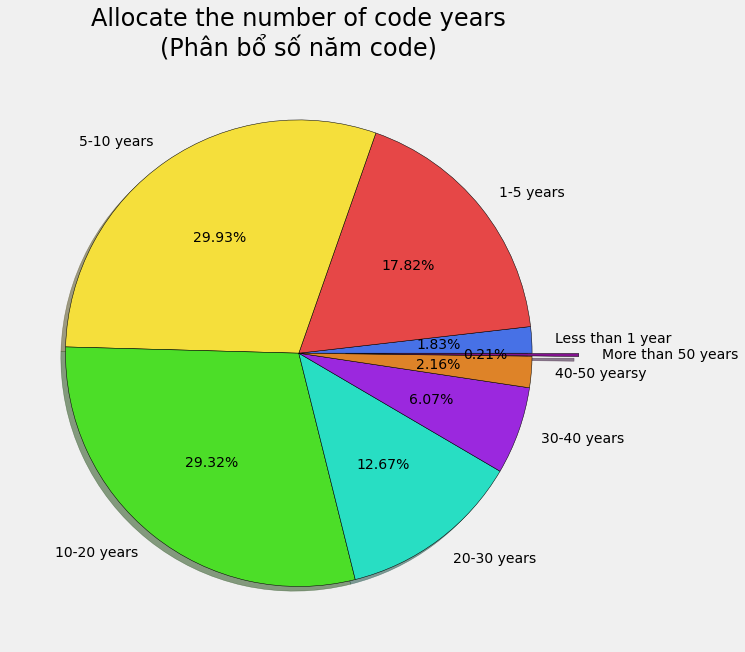

In [32]:
list_ycode = np.zeros(8, dtype='uint16')

for item in data_public['YearsCode']:
    try:
        a = int(item)
        if a >= 1 and a < 5:
            list_ycode[1] += 1
        elif a >= 5 and a < 10:
            list_ycode[2] += 1
        elif a >= 10 and a < 20:
            list_ycode[3] += 1
        elif a >= 20 and a < 30:
            list_ycode[4] += 1
        elif a >= 30 and a < 40:
            list_ycode[5] += 1
        elif a >= 40 and a < 50:
            list_ycode[6] += 1     
    except:
        if item == 'Less than 1 year':
            list_ycode[0] += 1
        if item == 'More than 50 years':
            list_ycode[7] += 1
            
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 10))

labels = ['Less than 1 year', '1-5 years', '5-10 years', '10-20 years', '20-30 years', '30-40 years', 
          '40-50 yearsy', 'More than 50 years']
explode = [0, 0, 0, 0, 0, 0, 0, 0.2]
colors = ['#4771e6', '#e64747', '#f5df3b', '#4cde28', '#28dec3', '#9b28de', '#de8328', '#84138f']

plt.pie(list_ycode, labels = labels, shadow = True, colors=colors,
        autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'}, explode=explode)
plt.title('Allocate the number of code years\n(Phân bổ số năm code)', fontsize=24)

plt.savefig('17_Year_code_distribution.jpg')
plt.show()

## 17: Phân bổ các quốc gia tham gia khảo sát

In [33]:
data_public['Country'].value_counts().head(10)

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Name: Country, dtype: int64

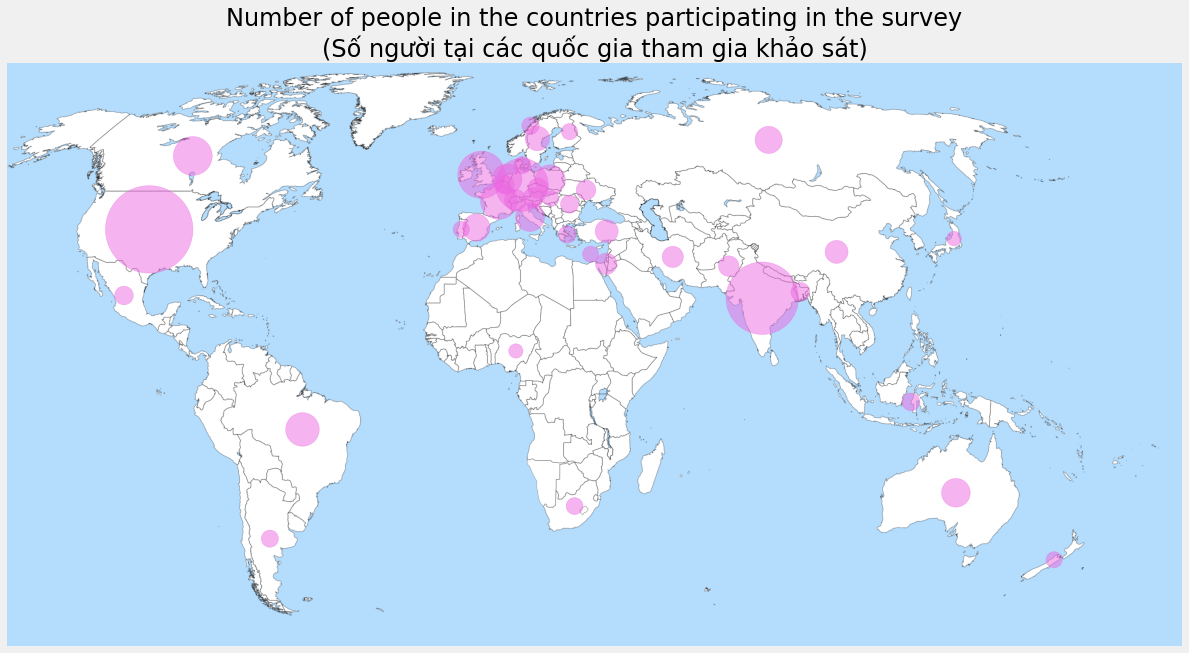

In [34]:
# x, y save the coordinates of the respective countries on the map
x = [309 , 1645, 1121, 1033, 404, 1071, 643, 1183, 1089, 1139, 2067, 1022, 1659, 1155, 1807, 1306, 1107, 1305, 1450, 
    1572, 1146, 1156, 1261, 1728, 1084, 254, 1225, 1969, 1220, 1140, 1122, 572 , 1236, 989, 1225, 2281, 1271, 1185, 2063,
    1108, ]
y = [363 , 513 , 266 , 244 , 203, 301 , 799, 255 , 253 , 336 , 937 , 359 , 168 , 165 , 412 , 367 , 299 , 438 , 423 , 
    443 , 294 , 273 , 277 , 499 , 266 , 507, 308 , 739 , 374 , 137 , 223 , 1037, 966 , 363, 150 , 1083, 417 , 296 , 383, 
    628 , ]
nums = data_public['Country'].value_counts().head(40).values.tolist()

sizes = []
for num in nums:
    sizes.append(num/2)
    
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.axis('off')
world_map = plt.imread('world_map.png')
ax.imshow(world_map)
ax.scatter(x, y, s=sizes[:len(x)], alpha=0.5, c='#ed68e2')
plt.title('Number of people in the countries participating in the survey\n(Số người tại các quốc gia tham gia khảo sát)', 
          fontsize=24)
plt.savefig('01_num_people.jpg')

## 18: Mức lương trung bình ở các vị trí làm việc theo khảo sát
Chúng ta sẽ dựa vào cột `ConvertedCompYearly` để tính toán việc này. Trong `survey_result_schema.csv` không có thông tin về cột này tuy nhiên theo tính toán từ 3 cột `Currency`, `CompTotal` và `CompFreq` thì có vẻ như Stack Overflow đã tính toán sẵn cho chúng ta.

Đầu tiên hãy cắt lấy 2 cột gồm ngành nghề và tiền lương đã chuyển đổi theo năm.

In [35]:
after_dropna = data_public[data_public['ConvertedCompYearly'].notna()]
my_dataframe = after_dropna[['DevType', 'ConvertedCompYearly']]
my_dataframe

,DevType,ConvertedCompYearly
0,"Developer, mobile",62268.0
9,Data scientist or machine learning specialist,51552.0
11,"Developer, back-end",46482.0
12,"Developer, desktop or enterprise applications;Developer, back-end",77290.0
16,"Developer, full-stack",17748.0
...,...,...
83434,"Developer, back-end",160500.0
83435,"Developer, full-stack",3960.0
83436,Data scientist or machine learning specialist;DevOps specialist,90000.0
83437,"Developer, back-end",816816.0


**Chúng ta sẽ dùng 3 list để lưu thông tin.**
+ Đầu tiên `list_type` lưu tên ngành nghề, đã được tạo ra ở trên
+ Thứ hai `total_comp` lưu tổng lương ngành nghề tương ứng
+ Thứ ba `num_occurrences` lưu số lần suất hiện ngành nghề tương ứng để phục vụ việc tính trung bình

In [39]:
total_comp = np.zeros(len(list_type), dtype='uint64')
num_occurrences = np.zeros(len(list_type), dtype='uint64')

for _, row in my_dataframe.iterrows():
    list_dev_type = str(row['DevType']).split(';')
    for dev_type in list_dev_type:
        for idx, item in enumerate(list_type):
            if item in dev_type:
                total_comp[idx] += int(row['ConvertedCompYearly'])
                num_occurrences[idx] += 1
                
                
total_comp

array([ 160239022,  144930411,   85524529,  384833326,  129075740,
        245404008,  453663685,  304865656,  278250235,  290598617,
        731097931,  367576674,  163838931,  481168729,  429567598,
        958871078,  609168854, 1372888295, 2453161857, 2864606372],
      dtype=uint64)

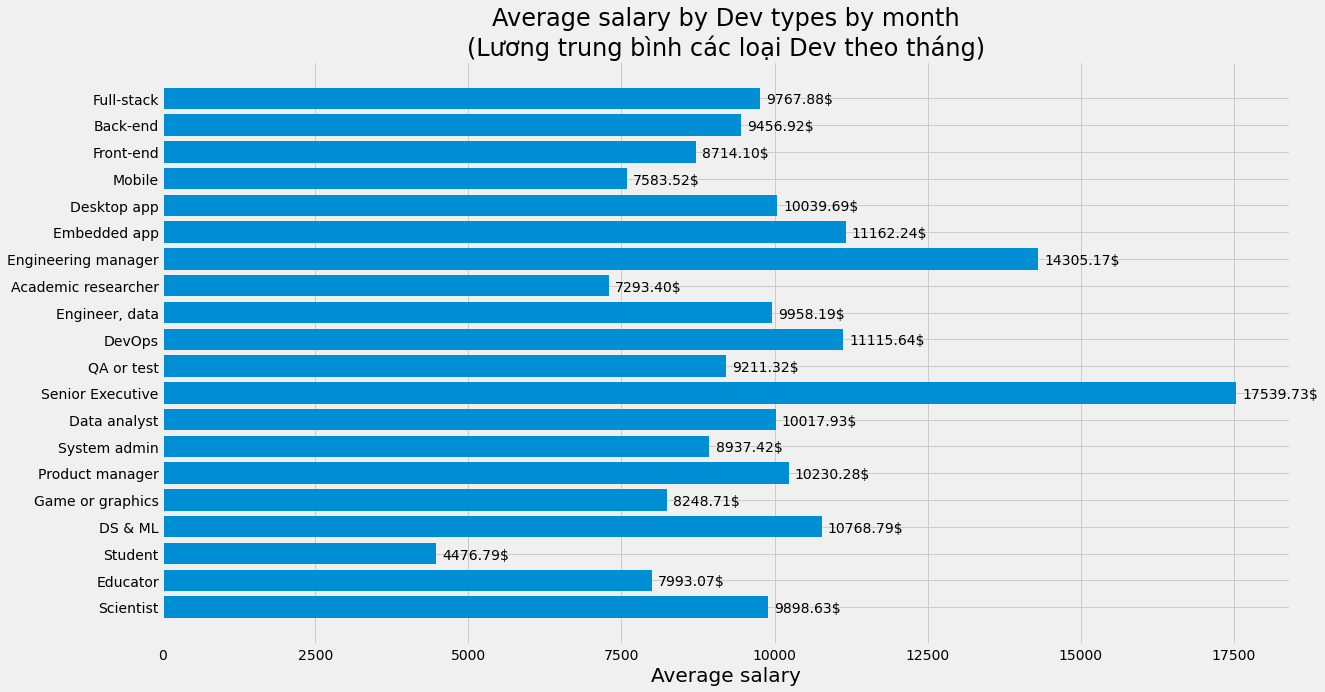

In [38]:
average_salary = []
for i in range(len(total_comp)):
    average_salary.append(total_comp[i] / num_occurrences[i] / 12)

plt.style.use('fivethirtyeight')
y_label = ['Full-stack', 'Back-end', 'Front-end', 'Mobile', 
            'Desktop app', 'Embedded app', 
            'Engineering manager', 'Academic researcher', 'Engineer, data', 'DevOps', 'QA or test',
            'Senior Executive', 'Data analyst', 'System admin', 'Product manager',
            'Game or graphics', 'DS & ML', 'Student', 'Educator', 'Scientist']
y_label.reverse()
plt.figure(figsize=(18,10))
plt.barh(y_label, average_salary)

plt.xlabel('Average salary', fontsize=20)
plt.title('Average salary by Dev types by month\n(Lương trung bình các loại Dev theo tháng)', fontsize=24)

for idx, num in enumerate(average_salary):
    plt.text(num + 100, idx - 0.2, '%.2f'%num + '$')
    
plt.savefig('18_average_salary.jpg')
plt.show()
